<a href="https://colab.research.google.com/github/Anngel-o/Reconocimiento-Tipos-Rostros-IA/blob/main/Red_CNN_Reconocimiento_de_Rostros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial cargar dataset de kaggle en colab: https://www-analyticsvidhya-com.translate.goog/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=wa

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joseangelortizmeraz","key":"51d0017d25c4a6a21535e4c50e009f38"}'}

In [ ]:
# mover el archivo kaggle.json al directorio correcto y darle permisos
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# descargar dataset
!kaggle datasets download -d niten19/face-shape-dataset

Dataset URL: https://www.kaggle.com/datasets/niten19/face-shape-dataset
License(s): CC0-1.0
 92% 585M/639M [00:03<00:01, 54.6MB/s]
100% 639M/639M [00:03<00:00, 188MB/s] 


In [ ]:
# descomprimir dataset
!unzip face-shape-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: FaceShape Dataset/testing_set/Heart/heart (123).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (13).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (135).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (136).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (137).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (138).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (139).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (140).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (141).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (156).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (161).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (163).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (189).jpg  
  inflating: FaceShape Dataset/testing_set/Heart/heart (192).jpg  
  inflating:

In [ ]:
import os

# listar archivos en el directorio del dataset para conocer su estructura
dataset_path = './FaceShape Dataset'
files = os.listdir(dataset_path)
print("Archivos en el dataset:", files)

Archivos en el dataset: ['training_set', 'desktop.ini', 'testing_set']


In [ ]:
# listar las carpetas dentro de training_set y testing_set
train_path = os.path.join(dataset_path, 'training_set')
test_path = os.path.join(dataset_path, 'testing_set')

train_subfolders = os.listdir(train_path)
test_subfolders = os.listdir(test_path)

print("Subcarpetas en training_set:", train_subfolders)
print("Subcarpetas en testing_set:", test_subfolders)

Subcarpetas en training_set: ['Oval', 'Oblong', 'Heart', 'desktop.ini', 'Square', 'Round']
Subcarpetas en testing_set: ['Oval', 'Oblong', 'Heart', 'Square', 'Round']


In [ ]:
import pandas as pd

# cargar imágenes y etiquetas desde una carpeta
def load_images_and_labels(folder_path):
    data = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):  # isdir para comprobar si es una carpeta
            for image_file in os.listdir(label_path):
                if image_file.endswith(('.jpg', '.png', '.jpeg')):  # procesamos solo las imagenes
                    data.append({
                        'image_filename': os.path.join(label_path, image_file),
                        'face_shape': label
                    })
    return pd.DataFrame(data)

# cargar datos de entrenamiento y prueba
train_df = load_images_and_labels(train_path)
test_df = load_images_and_labels(test_path)

# mostrar las primeras filas de los DataFrames
print("Datos de entrenamiento:")
print(train_df.head())

print("\nDatos de prueba:")
print(test_df.head())

Datos de entrenamiento:
                                      image_filename face_shape
0  ./FaceShape Dataset/training_set/Oval/oval (89...       Oval
1  ./FaceShape Dataset/training_set/Oval/oval (17...       Oval
2  ./FaceShape Dataset/training_set/Oval/oval (30...       Oval
3  ./FaceShape Dataset/training_set/Oval/oval (87...       Oval
4  ./FaceShape Dataset/training_set/Oval/oval (55...       Oval

Datos de prueba:
                                      image_filename face_shape
0  ./FaceShape Dataset/testing_set/Oval/oval (294...       Oval
1  ./FaceShape Dataset/testing_set/Oval/oval (650...       Oval
2  ./FaceShape Dataset/testing_set/Oval/oval (627...       Oval
3  ./FaceShape Dataset/testing_set/Oval/oval (275...       Oval
4  ./FaceShape Dataset/testing_set/Oval/oval (388...       Oval


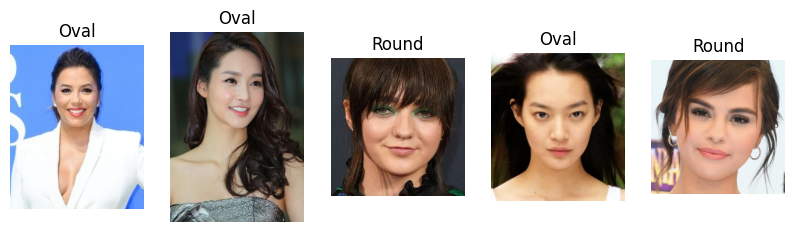

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# imprimir algunas imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 5))
for idx, (_, row) in enumerate(train_df.sample(5).iterrows()):
    image = Image.open(row['image_filename'])
    plt.subplot(1, 5, idx + 1)
    plt.imshow(image)
    plt.title(row['face_shape'])
    plt.axis('off')
plt.show()

In [ ]:
# Calcular porcentajes de los conjuntos entrenamiento y pruebas
total_samples = len(train_df) + len(test_df)
train_percent = (len(train_df) / total_samples) * 100
test_percent = (len(test_df) / total_samples) * 100

print(f"Entrenamiento: {train_percent:.2f}% ({len(train_df)} imágenes)")
print(f"Pruebas: {test_percent:.2f}% ({len(test_df)} imágenes)")

Entrenamiento: 80.00% (3999 imágenes)
Pruebas: 20.00% (1000 imágenes)


Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.

Clases encontradas en entrenamiento: {'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}


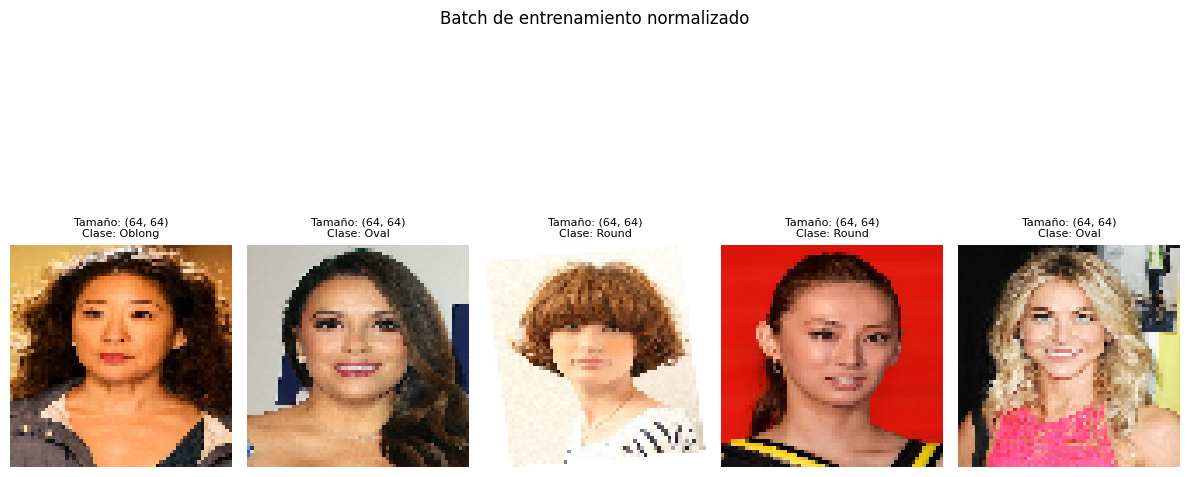


Resumen de datasets:
- Entrenamiento: 3200 muestras
- Validación: 800 muestras
- Prueba: 1000 muestras


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageFile
import numpy as np

#DEBIDO A QUE EL DATASET CONTENÍA IMÁGENES CORRUPTAS O DAÑADAS SE UTILIZÓ LA AYUDA DE INTELIGENCIA ARTIFICIAL
#PARA LLEGAR A UNA SOLUCIÓN MÁS ROBUSTA DE MANEJO DE IMÁGENES DAÑADAS/CORRUPTAS Y MANEJO CORRECTO DE ERRORES

# Configuración para manejar imágenes truncadas
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Permite cargar imágenes truncadas

# Definir parámetros
TARGET_SIZE = (64, 64)  # Input_shape del modelo
BATCH_SIZE = 16

# Función para cargar imágenes de forma segura
def safe_image_load(img_path, target_size):
    try:
        img = Image.open(img_path)
        img = img.convert('RGB')  # Asegura que sea RGB
        img = img.resize(target_size)
        return img
    except (IOError, OSError) as e:
        print(f"Error al cargar imagen {img_path}: {str(e)}")
        # Retorna una imagen negra como placeholder
        return Image.new('RGB', target_size, (0, 0, 0))

# Crear generadores de datos con normalización y manejo de errores
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=lambda x: x,  # Función dummy para manejo de errores
    validation_split=0.2  # Opcional: para separar validación
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Crear flujos de datos (datasets) con manejo robusto
try:
    train_ds = train_datagen.flow_from_directory(
        train_path,
        target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse',
        shuffle=True,
        subset='training'  # Opcional: para separar validación
    )

    val_ds = train_datagen.flow_from_directory(
        train_path,
        target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse',
        shuffle=False,
        subset='validation'
    )

    test_ds = test_datagen.flow_from_directory(
        test_path,
        target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse',
        shuffle=False
    )

except Exception as e:
    print(f"Error al crear datasets: {str(e)}")

# Verificar las clases encontradas
if 'train_ds' in locals():
    print("\nClases encontradas en entrenamiento:", train_ds.class_indices)
    class_names = list(train_ds.class_indices.keys())

    # Visualización mejorada con manejo de errores
    plt.figure(figsize=(12, 6))
    try:
        sample_images, sample_labels = next(train_ds)

        for i in range(min(5, len(sample_images))):  # Asegura no exceder el batch
            plt.subplot(1, 5, i+1)
            plt.imshow(sample_images[i])

            # Obtener información para la etiqueta
            img_shape = sample_images[i].shape
            class_idx = int(sample_labels[i])
            class_name = class_names[class_idx]

            plt.title(f"Tamaño: {img_shape[:2]}\nClase: {class_name}", fontsize=8)
            plt.axis('off')

        plt.suptitle("Batch de entrenamiento normalizado", y=1.05)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al visualizar imágenes: {str(e)}")
        # Muestra placeholder si hay error
        plt.imshow(np.zeros(TARGET_SIZE + (3,)))
        plt.title("Error de visualización")
        plt.show()
else:
    print("No se pudo crear el dataset de entrenamiento")

# Información adicional de depuración
print("\nResumen de datasets:")
if 'train_ds' in locals():
    print(f"- Entrenamiento: {train_ds.samples} muestras")
if 'val_ds' in locals():
    print(f"- Validación: {val_ds.samples} muestras")
if 'test_ds' in locals():
    print(f"- Prueba: {test_ds.samples} muestras")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 614,245 (2.34 MB)

 Trainable params: 614,021 (2.34 MB)

 Non-trainable params: 224 (896.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 209ms/step - accuracy: 0.2395 - loss: 2.3609 - val_accuracy: 0.2380 - val_loss: 1.6203 - learning_rate: 0.0010
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.2742 - loss: 1.6126 - val_accuracy: 0.2670 - val_loss: 1.6252 - learning_rate: 0.0010
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.2835 - loss: 1.5679 - val_accuracy: 0.3030 - val_loss: 1.5647 - learning_rate: 0.0010
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 223ms/step - accuracy: 0.3187 - loss: 1.5082 - val_accuracy: 0.2560 - val_loss: 1.6699 - learning_rate: 0.0010
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.3000 - loss: 1.4925 - val_accuracy: 0.3420 - val_loss: 1.5283 - learning_rate: 0.0010
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.3235 - loss: 1.4830 - val_accuracy: 0.3080 - val_loss: 1.7331 - learning_rate: 0.0010
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.3

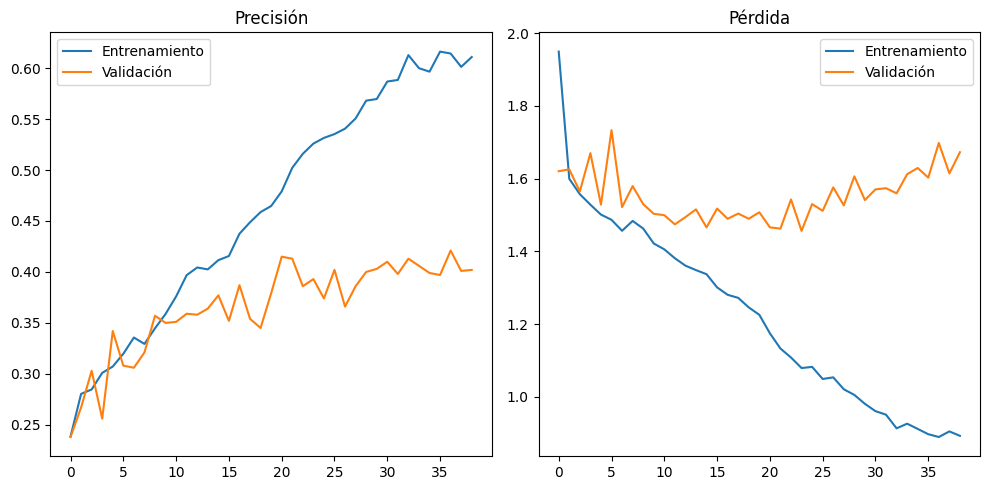

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.3615 - loss: 1.4285

Precisión en prueba: 0.3930


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 1. Crear modelo CNN
def create_simple_cnn(input_shape=(64, 64, 3), num_classes=5):
    model = models.Sequential([
        # Capa 1
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Capa 2
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Capa 3
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Clasificador
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Crear y compilar el modelo
model = create_simple_cnn()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# 3. Resumen del modelo
model.summary()

# 4. Entrenar modelo
history = model.fit(train_ds,  # dataset de entrenamiento
                    epochs=40,
                    validation_data=test_ds,  # dataset de validación
                    callbacks=callbacks)

# 5. Visualización del entrenamiento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Evaluación del modelo
test_loss, test_acc = model.evaluate(test_ds)
print(f'\nPrecisión en prueba: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,357 (95.14 KB)

 Trainable params: 24,133 (94.27 KB)

 Non-trainable params: 224 (896.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 44s 195ms/step - accuracy: 0.2250 - loss: 1.6787 - val_accuracy: 0.2000 - val_loss: 1.8770 - learning_rate: 0.0010
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 193ms/step - accuracy: 0.2520 - loss: 1.6123 - val_accuracy: 0.2080 - val_loss: 1.8316 - learning_rate: 0.0010
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 192ms/step - accuracy: 0.2803 - loss: 1.5758 - val_accuracy: 0.2250 - val_loss: 1.8291 - learning_rate: 0.0010
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.2838 - loss: 1.5662 - val_accuracy: 0.2170 - val_loss: 2.0358 - learning_rate: 0.0010
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.2822 - loss: 1.5700 - val_accuracy: 0.2780 - val_loss: 1.7971 - learning_rate: 0.0010
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - accuracy: 0.3250 - loss: 1.5282 - val_accuracy: 0.2240 - val_loss: 1.6131 - learning_rate: 0.0010
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 44s 220ms/step - accuracy: 0.3

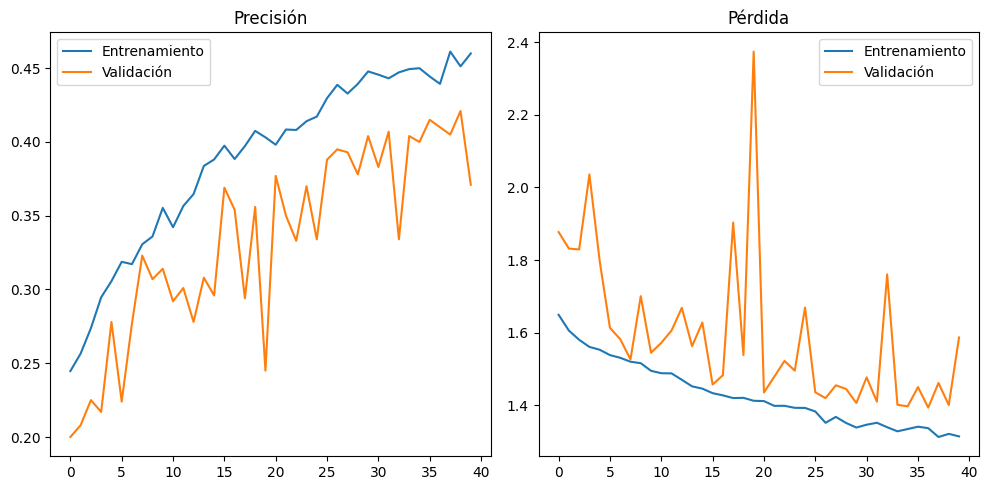

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.3993 - loss: 1.3584

Precisión en prueba: 0.4100


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 1. Crear modelo CNN
def create_simple_cnn(input_shape=(64, 64, 3), num_classes=5):
    model = models.Sequential([
        # Capa 1
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Capa 2
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Capa 3
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Clasificador
        layers.GlobalAveragePooling2D(),
        #layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Crear y compilar el modelo
model = create_simple_cnn()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# 3. Resumen del modelo
model.summary()

# 4. Entrenar modelo
history = model.fit(train_ds,  # dataset de entrenamiento
                    epochs=40,
                    validation_data=test_ds,  # dataset de validación
                    callbacks=callbacks)

# 5. Visualización del entrenamiento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Evaluación del modelo
test_loss, test_acc = model.evaluate(test_ds)
print(f'\nPrecisión en prueba: {test_acc:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step


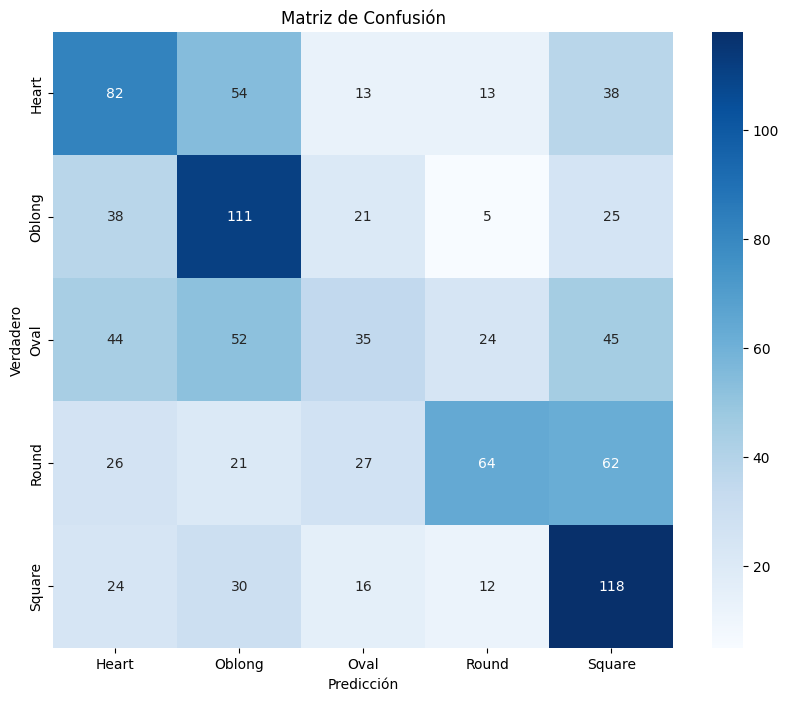


Reporte de Clasificación:
              precision    recall  f1-score   support

       Heart       0.38      0.41      0.40       200
      Oblong       0.41      0.56      0.47       200
        Oval       0.31      0.17      0.22       200
       Round       0.54      0.32      0.40       200
      Square       0.41      0.59      0.48       200

    accuracy                           0.41      1000
   macro avg       0.41      0.41      0.40      1000
weighted avg       0.41      0.41      0.40      1000



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Obtener las predicciones del modelo
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades a clases

# Obtener las etiquetas verdaderas
y_true = test_ds.classes

# Obtener los nombres de las clases
class_names = list(test_ds.class_indices.keys())

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# También puedes mostrar el reporte de clasificación
from sklearn.metrics import classification_report
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

In [ ]:
#GUARDAR EL MODELO
# 1. Guardar el modelo
from tensorflow.keras.models import save_model
from google.colab import files

try:
    save_model(model, 'face_shape_model.h5')
    print("Modelo guardado correctamente como face_shape_model.h5")

    # 2. Verificar tamaño
    print("\n📄 Información del archivo:")
    !ls -lh face_shape_model.h5

    # 3. Opciones de descarga
    print("\nOpciones para descargar:")
    print("1. files.download() - Ejecuta: files.download('face_shape_model.h5')")
    print("2. Google Drive - Ejecuta: !cp face_shape_model.h5 '/content/drive/MyDrive/'")
    print("3. Panel izquierdo → Archivos → Click derecho → Descargar")

except Exception as e:
    print(f"Error al guardar el modelo: {str(e)}")

Modelo guardado correctamente como face_shape_model.h5

📄 Información del archivo:
-rw-r--r-- 1 root root 353K May 24 17:14 face_shape_model.h5

Opciones para descargar:
1. files.download() - Ejecuta: files.download('face_shape_model.h5')
2. Google Drive - Ejecuta: !cp face_shape_model.h5 '/content/drive/MyDrive/'
3. Panel izquierdo → Archivos → Click derecho → Descargar


In [ ]:
files.download('face_shape_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,517 (111.39 KB)

 Trainable params: 28,293 (110.52 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.2210 - loss: 1.6256

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 189ms/step - accuracy: 0.2211 - loss: 1.6256 - val_accuracy: 0.2188 - val_loss: 1.6392 - learning_rate: 0.0010
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.2453 - loss: 1.6000 - val_accuracy: 0.1912 - val_loss: 1.6633 - learning_rate: 0.0010
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 184ms/step - accuracy: 0.2841 - loss: 1.5710 - val_accuracy: 0.1912 - val_loss: 1.7107 - learning_rate: 0.0010
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 184ms/step - accuracy: 0.3002 - loss: 1.5595 - val_accuracy: 0.3013 - val_loss: 1.5553 - learning_rate: 0.0010
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 183ms/step - accuracy: 0.3182 - loss: 1.5264 - val_accuracy: 0.2600 - val_loss: 1.5854 - learning_rate: 0.0010
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.3255 - loss: 1.5390 - val_accuracy: 0.2962 - val_loss: 1.5574 - learning_rate: 0.0010
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.3492 - loss:

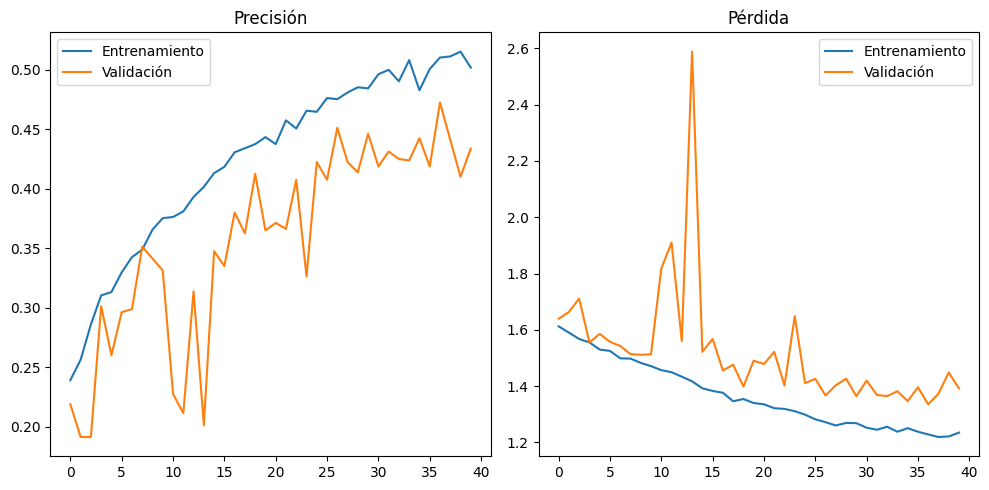

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.3814 - loss: 1.4306

Precisión en prueba: 0.4090


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 1. Crear modelo CNN
def create_simple_cnn(input_shape=(64, 64, 3), num_classes=5):
    model = models.Sequential([
        # Capa 1
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Capa 2
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Capa 3
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Clasificador
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Crear y compilar el modelo
model = create_simple_cnn()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# 3. Resumen del modelo
model.summary()

# 4. Entrenar modelo
history = model.fit(train_ds,  # dataset de entrenamiento
                    epochs=40,
                    validation_data=val_ds,  # dataset de validación
                    callbacks=callbacks)

# 5. Visualización del entrenamiento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Evaluación del modelo
test_loss, test_acc = model.evaluate(test_ds)
print(f'\nPrecisión en prueba: {test_acc:.4f}')